In [1]:
# Stuff that will appear at the top of notebooks;
# You don't have to understand how this works or change it for now.

from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [2]:
2+3

5

In [3]:
# Read two books, fast!

#huck_finn_url = 'https://www.inferentialthinking.com/data/huck_finn.txt'
#huck_finn_text = read_url(huck_finn_url)
file = open("huck_finn.txt",mode='r')
huck_finn_text = file.read()
file.close()
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[44:]

#little_women_url = 'https://www.inferentialthinking.com/data/little_women.txt'
#little_women_text = read_url(little_women_url)
file = open("little_women.txt",mode='r')
little_women_text = file.read()
file.close()
little_women_chapters = little_women_text.split('CHAPTER ')[1:]

In [4]:
#huck_finn_chapters

In [5]:
#little_women_chapters

In [6]:
Table().with_column('Chapters', huck_finn_chapters)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees ba ...
"III. WELL, I got a good going-over in the morning from ..."
"IV. WELL, three or four months run along, and it was we ..."
V. I had shut the door to. Â Then I turned around and t ...
"VI. WELL, pretty soon the old man was up and around aga ..."
"VII. ""GIT up! Â What you 'bout?"" I opened my eyes and ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I wanted to go and look at a place right about the ...
X. AFTER breakfast I wanted to talk about the dead man ...


In [7]:
np.char.count(huck_finn_chapters, 'Tom')

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  4, 19, 15,
       14, 18,  9, 32, 11, 11,  8, 30,  6])

In [8]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  5, 17,
       18, 23,  4, 27, 10, 13,  0, 12,  6])

In [9]:
counts = Table().with_columns([
    'Tom', np.char.count(huck_finn_chapters, 'Tom'),
    'Jim', np.char.count(huck_finn_chapters, 'Jim'),
    'Huck', np.char.count(huck_finn_chapters, 'Huck'),
])
counts

Tom,Jim,Huck
6,0,3
24,16,2
5,0,2
0,8,1
0,0,0
0,0,2
2,0,0
2,22,5
0,11,1
0,19,0


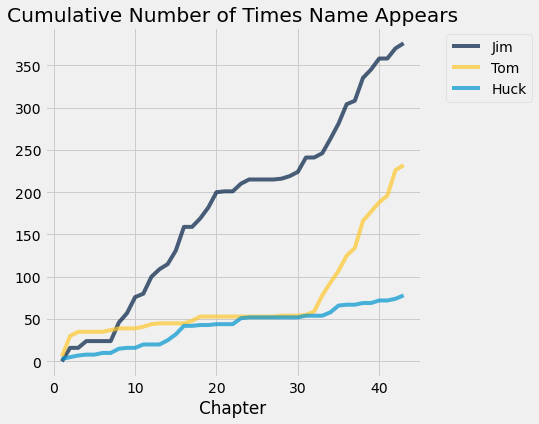

In [10]:
# Count how many times the names Jim, Tom, and Huck appear in each chapter

counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

# Plot the cumulative counts:
# how many times in Chapter 1, how many times in Chapters 1 and 2, and so on.

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Name Appears');

In [11]:
# The chapters of Little Women

Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas wit ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" crie ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfe ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the mo ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of ..."


In [12]:
# Counts of names in the chapters of Little Women

people = ['Amy', 'Beth', 'Jo', 'Laurie', 'Meg']
people_counts = {pp: np.char.count(little_women_chapters, pp) for pp in people}

counts = Table().with_columns([
        'Amy', people_counts['Amy'],
        'Beth', people_counts['Beth'],
        'Jo', people_counts['Jo'],
        'Laurie', people_counts['Laurie'],
        'Meg', people_counts['Meg']
    ])

In [13]:
counts

Amy,Beth,Jo,Laurie,Meg
23,26,44,0,26
13,12,21,0,20
2,2,62,16,36
14,18,34,0,17
6,14,55,35,13
6,28,13,9,5
27,5,9,7,5
48,9,71,17,16
3,5,21,24,71
5,5,12,4,4


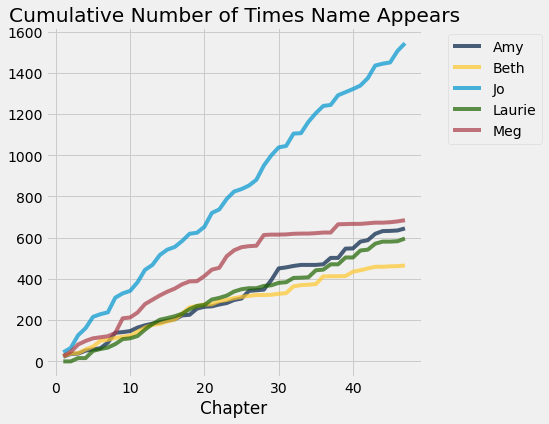

In [14]:
# Plot the cumulative counts

cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Name Appears');

In [15]:
# In each chapter, count the number of all characters;
# call this the "length" of the chapter.
# Also count the number of periods.

chars_periods_hf = Table().with_columns([
        'HF Chapter Length', [len(s) for s in huck_finn_chapters],
        'Number of Periods', np.char.count(huck_finn_chapters, '.')
    ])
chars_periods_lw = Table().with_columns([
        'LW Chapter Length', [len(s) for s in little_women_chapters],
        'Number of Periods', np.char.count(little_women_chapters, '.')
    ])

In [16]:
# The counts for Huckleberry Finn

chars_periods_hf

HF Chapter Length,Number of Periods
7137,66
12198,117
8674,72
6957,84
8333,91
14772,125
13446,127
22668,249
8200,71
7165,70


In [17]:
# The counts for Little Women

chars_periods_lw

LW Chapter Length,Number of Periods
21952,189
22384,188
20815,231
25689,195
23657,255
14736,140
14549,131
22679,214
34054,337
19657,185


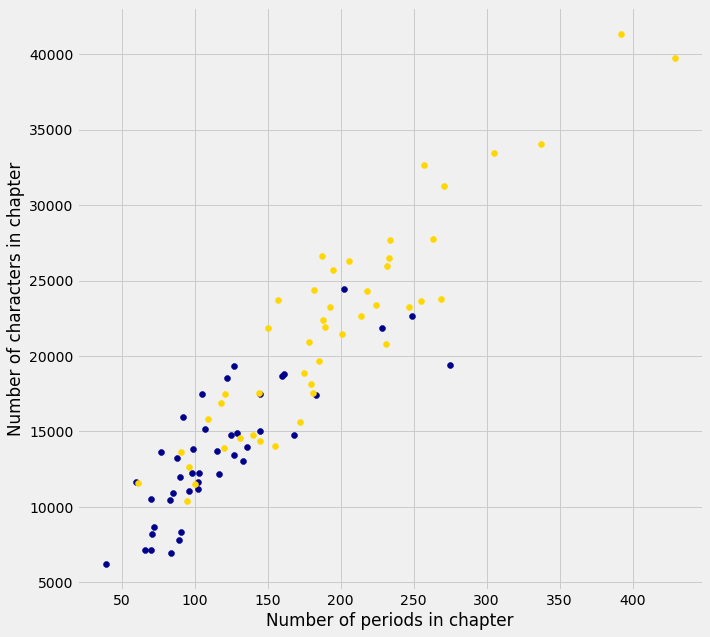

In [18]:
plots.figure(figsize=(10,10))
plots.scatter(chars_periods_hf[1], chars_periods_hf[0], color='darkblue')
plots.scatter(chars_periods_lw[1], chars_periods_lw[0], color='gold')
plots.xlabel('Number of periods in chapter')
plots.ylabel('Number of characters in chapter');